# Transformada de Wavelet Discreta

A continuacion se presentara la transformada discreta de Wavelet

Antes de correr este programa asegurarse de tener instalado

Py Wavelets
## pip install PyWavelets


Para empezar importamos las librerias necesarias

#### La libreria time solamente es para determinar el tiempo en el que se ejecuta el codigo

Links para medicion:

https://scikit-image.org/docs/0.12.x/api/skimage.measure.html#skimage.measure.compare_mse

https://pywavelets.readthedocs.io/en/latest/ref/dwt-coefficient-handling.html

In [1]:
import numpy as np
import pywt 
from matplotlib import pyplot as plt
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis
from skimage import io, color
from skimage.measure import compare_psnr, compare_nrmse
from numpy.testing import assert_array_almost_equal
import sys


In [2]:
def graf_P(name):
    data = io.imread(name)
    x = color.rgb2gray(data)
    shape = x.shape
    
    fig, axes = plt. subplots(2,2, figsize= [14,8])
    
    axes[0,0].imshow(x, cmap=plt.cm.gray)
    axes[0,0].set_title("Image")
    axes[0,0].set_axis_off()
    
    draw_2d_wp_basis(shape, wavedec2_keys(1), ax=axes[0, 1],
                     label_levels=1)
    axes[0, 1].set_title('{} level\ndecomposition'.format(1))
    coeffs = pywt.wavedecn(x, wavelet='db2', level=1)
    arr, coeff_slices, coeff_shapes = pywt.ravel_coeffs(coeffs)
    
    c=pywt.wavedec2(x, 'db2', mode= "zero", level=3)
    c[0] /= np.abs(c[0]).max()
    for detail_level in range(2):
        c[detail_level +1] =[d/np.abs(d).max() for d in c[detail_level + 1]]
    arrL, slicesL = pywt.coeffs_to_array(c)
    
    axes[1, 1].imshow(arrL, cmap=plt.cm.gray)
    axes[1, 1].set_title('Coefficients\n({} level)'.format(1))
    axes[1, 1].set_axis_off()
    x_recon , coeffs_to_array = ReconstructDWT(arr, coeff_slices, coeff_shapes)
    axes[1,0].imshow(x_recon, cmap=plt.cm.gray)
    axes[1,0].set_title('Inverse {}'.format(name))
    axes[1,0].set_axis_off()
    return x, x_recon, coeffs_to_array


In [3]:
def ReconstructDWT(arr, coeff_slices, coeff_shapes):
    coeffs_from_arr = pywt.unravel_coeffs(arr, coeff_slices, coeff_shapes,
                                          output_format='wavedecn')
    x_recon = pywt.waverecn(coeffs_from_arr, wavelet='db2')
    #assert_array_almost_equal(x, x_recon)    para observar el error
    return x_recon, coeffs_from_arr

In [4]:
def TestingDWT(name):
    x, x_recon, coeffs_from_arr = graf_P(name)
    mse = compare_nrmse(x, x_recon)
    psnr = compare_psnr(x, x_recon)
    return mse, psnr, coeffs_from_arr

C:\Users\Usuario\Anaconda3\lib\site-packages\skimage\measure\simple_metrics.py:133: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  warn("Inputs have mismatched dtype.  Setting data_range based on "


lena.png,2.461318419812983e-16,322.5914507017563


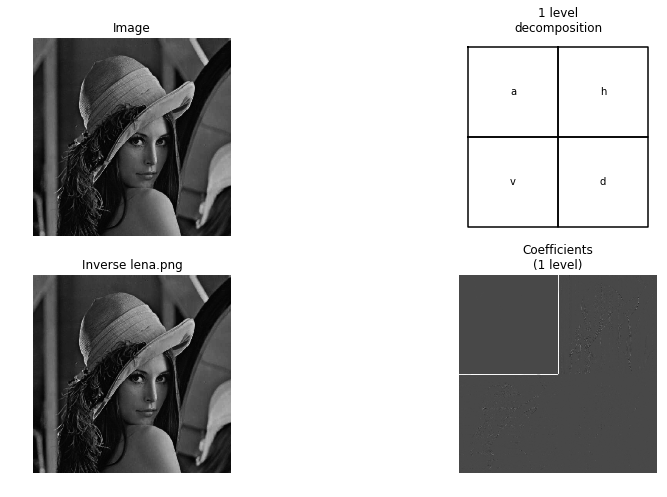

In [5]:
if __name__ == "__main__":
    name = "lena.png"
    mse, psnr, coeffs_from_arr = TestingDWT(name)
    data = "{},{},{}".format(name, mse, psnr)
    print (data)

In [9]:
name = "lena.png"
data = io.imread(name)
data = color.rgb2gray(data)    
coeffs = pywt.wavedecn(data, wavelet='db2', level=2)
arr, coeff_slices, coeff_shapes = pywt.ravel_coeffs(coeffs)
coeffs_from_arr = pywt.unravel_coeffs(arr, coeff_slices, coeff_shapes,
                                      output_format='wavedecn')
cam_recon = pywt.waverecn(coeffs_from_arr, wavelet='db2')
assert_array_almost_equal(data, cam_recon)


In [6]:
coeffs_from_arr

[array([[457.125     , 410.5836478 , 377.01225953, ..., 387.05144284,
         391.04422863, 371.25      ],
        [411.90392002, 329.43683252, 269.08532186, ..., 284.45166944,
         293.27426007, 258.6331576 ],
        [376.34150635, 266.95583456, 186.73205081, ..., 199.64086663,
         210.08517234, 170.41746825],
        ...,
        [286.98205081, 139.43451411,  21.27003175, ...,  64.95216426,
          69.32475953,  65.43870237],
        [282.69527223, 135.1399633 ,  18.30472777, ...,  67.90969602,
          69.88068967,  69.58493649],
        [281.5       , 134.16119743,  17.99671507, ...,  69.06370237,
          72.85048095,  74.        ]]),
 {'ad': array([[ 5.00129671e+01, -8.18172401e+00, -1.37259526e-01, ...,
          -4.41987298e-01, -1.33493649e+00, -3.03108891e+00],
         [ 8.87163969e+01, -1.41732211e+01, -3.37019053e-01, ...,
          -1.78677858e+00, -2.53381582e+00, -5.15368418e+00],
         [ 1.17187949e+02, -2.04109616e+01, -1.83012702e-01, ...,
         

# Script dwt3.py 

In [1]:
import numpy as np
import pywt 
import cv2 
import imageio

In [2]:
def ProcesoDWT(name, level=1):
    #proceso de DWT en nivel 1
    coeffs = pywt.wavedecn(name, wavelet='db2',level = level)
    arr, coeff_slices, coeff_shapes = pywt.ravel_coeffs(coeffs)
    coeffs_from_arr = pywt.unravel_coeffs(arr, coeff_slices, coeff_shapes, output_format='wavedecn')
    return coeffs_from_arr

In [3]:
def Save_data(coeffs_from_arr):
    np.savetxt('coef.txt', coeffs_from_arr, fmt='%s')

In [4]:
def separar_Coef(coeffs_from_arr):
    a =coeffs_from_arr[0]
    h =coeffs_from_arr[1]["ad"]
    v =coeffs_from_arr[1]["da"]
    d =coeffs_from_arr[1]["dd"]
    return a, h, v, d

In [5]:
def Save_images(coeffs_from_arr):
    a, h, v, d = separar_Coef(coeffs_from_arr)
    imageio.imwrite('a.bmp', a)
    imageio.imwrite('h.bmp', h)
    imageio.imwrite('v.bmp', v)
    imageio.imwrite('d.bmp', d)


In [6]:
def Save_txt(coeffs_from_arr):
    a, h, v, d = separar_Coef(coeffs_from_arr)
    array = [a,h,v,d]
    b = ["a","h", "v", "d"]
    for n in range(len(array)):
        np.savetxt('{}.txt'.format(b[n]), array[n])   

In [7]:
def out_DWT(coeffs_from_arr, mode="2"):
    if mode == "0":
        Save_data(coeffs_from_arr)
    elif mode == "1":
        Save_images(coeffs_from_arr)
    elif mode == "2":
        Save_txt(coeffs_from_arr)

In [8]:
def load_Images():
    ar = ["a.bmp","h.bmp","v.bmp","d.bmp"]
    a = io.imread(ar[0])
    h = io.imread(ar[1])
    v = io.imread(ar[2])
    d = io.imread(ar[3])
    return a, h, v, d

In [9]:
def load_txt():
    a = np.genfromtxt('a.txt')
    h = np.genfromtxt('h.txt')
    v = np.genfromtxt('v.txt')
    d = np.genfromtxt('d.txt')
    return a, h, v, d

In [10]:
def unir_Coef(mode):
    if mode == True:
        a,h,v,d = load_txt()
    else:
        a,h,v,d = load_Images()
    s = dict({"ad": h, "da": v, "dd": d}) 
    coeffs_from_arr = [a, s]
    return coeffs_from_arr

In [11]:
def ReconstructDWT(mode=True):
    if mode == None:
        coeffs_from_arr = np.genfromtxt('coef.txt')
    else:
        coeffs_from_arr = unir_Coef(mode)
    name_recon = pywt.waverecn(coeffs_from_arr, wavelet='db2')
    #assert_array_almost_equal(x, x_recon)  #para observar el error
    return name_recon

In [12]:
#Calcular MSE y PSNR
def TestingDWT(name, modeP = "2", modeR = False):
    print("Recuerda que los modos son 0:None, 1:True y 2:False")
    
    coeffs_from_arr = ProcesoDWT(name)
    out_DWT(coeffs_from_arr, modeP)
    
    name_recon = ReconstructDWT(modeR)
    """
    mse = compare_nrmse(name, name_recon)
    psnr = compare_psnr(name, name_recon)
    """
    return mse, psnr

In [14]:
if __name__ == "__main__":
    data = "lena"
    name = "{}.png".format(data)
    name = cv2.imread(name, cv2.IMREAD_GRAYSCALE)
    #Testing mode
    #mse, psnr = TestingDWT(name)
    #Proceso DWT
    coeffs_from_arr = ProcesoDWT(name)
    out_DWT(coeffs_from_arr)
    #Reconstruccion DWT
    name_recon = ReconstructDWT()
    imageio.imwrite('{}_des.png'.format(data), name_recon)
    #data = "{},{},{}".format(name, mse, psnr)
    data = "{} procesada".format(data)
    print (data)

lena procesada


In [44]:
coeffs_from_arr

[array([[457.125     , 410.5836478 , 377.01225953, ..., 387.05144284,
         391.04422863, 371.25      ],
        [411.90392002, 329.43683252, 269.08532186, ..., 284.45166944,
         293.27426007, 258.6331576 ],
        [376.34150635, 266.95583456, 186.73205081, ..., 199.64086663,
         210.08517234, 170.41746825],
        ...,
        [286.98205081, 139.43451411,  21.27003175, ...,  64.95216426,
          69.32475953,  65.43870237],
        [282.69527223, 135.1399633 ,  18.30472777, ...,  67.90969602,
          69.88068967,  69.58493649],
        [281.5       , 134.16119743,  17.99671507, ...,  69.06370237,
          72.85048095,  74.        ]]),
 {'ad': array([[ 5.00129671e+01, -8.18172401e+00, -1.37259526e-01, ...,
          -4.41987298e-01, -1.33493649e+00, -3.03108891e+00],
         [ 8.87163969e+01, -1.41732211e+01, -3.37019053e-01, ...,
          -1.78677858e+00, -2.53381582e+00, -5.15368418e+00],
         [ 1.17187949e+02, -2.04109616e+01, -1.83012702e-01, ...,
         

In [13]:
data = "lena"
name = "{}.png".format(data)
name = cv2.imread(name, cv2.IMREAD_GRAYSCALE)

In [14]:
coeffs = pywt.wavedecn(name, wavelet='db2',level = 3)
arr, coeff_slices, coeff_shapes = pywt.ravel_coeffs(coeffs)

In [17]:
arr

array([ 1.67564310e+03,  1.61487747e+03,  1.34758905e+03, ...,
        1.37259526e-01, -2.16506351e-01,  9.86076132e-32])

In [18]:
coeff_slices

[slice(None, 11664, None),
 {'ad': slice(11664, 23328, None),
  'da': slice(23328, 34992, None),
  'dd': slice(34992, 46656, None)},
 {'ad': slice(46656, 92452, None),
  'da': slice(92452, 138248, None),
  'dd': slice(138248, 184044, None)},
 {'ad': slice(184044, 365520, None),
  'da': slice(365520, 546996, None),
  'dd': slice(546996, 728472, None)}]

In [19]:
coeff_shapes

[(108, 108),
 {'ad': (108, 108), 'da': (108, 108), 'dd': (108, 108)},
 {'ad': (214, 214), 'da': (214, 214), 'dd': (214, 214)},
 {'ad': (426, 426), 'da': (426, 426), 'dd': (426, 426)}]

In [15]:
arrep = [arr, coeff_slices, coeff_shapes]
name = ["arr", "coeff_slices", "coeff_shapes"]
for n in range(len(arrep)):
    np.savetxt(name[n], arrep[n])

TypeError: Mismatch between array dtype ('object') and format specifier ('%.18e')

In [22]:
imageio.imwrite('arr.bmp', coeff_shapes)

ValueError: Image must be a numpy array.

In [23]:
imageio.imwrite('arr.bmp', coeff_shapes)

ValueError: Image must be a numpy array.

In [56]:
np.savetxt('coeff_slices.txt', coeff_slices,fmt='%5s',delimiter=',')

In [28]:
np.savetxt('coeff_shapes.txt',coeff_shapes,fmt='%5s',delimiter=',')

In [63]:
a = np.genfromtxt('coeff_shapes.txt', delimiter="\n")

array([nan, nan, nan, nan])

In [25]:
coeffs_ftxt

array([ 1.67564310e+03,  1.61487747e+03,  1.34758905e+03, ...,
        1.37259526e-01, -2.16506351e-01,  9.86076132e-32])

In [40]:
coeffs_from_arr = pywt.unravel_coeffs(arr, coeff_slices, coeff_shapes, output_format='wavedecn')

In [38]:
np.savetxt('coeffs.txt',coeffs_from_arr,fmt='%5s',delimiter=',')

In [55]:
n = np.genfromtxt("coeffs.txt")

ValueError: Some errors were detected !
    Line #2 (got 2 columns instead of 5)
    Line #4 (got 2 columns instead of 5)
    Line #6 (got 2 columns instead of 5)
    Line #7 (got 1 columns instead of 5)
    Line #8 (got 6 columns instead of 5)
    Line #9 (got 2 columns instead of 5)
    Line #10 (got 6 columns instead of 5)
    Line #11 (got 2 columns instead of 5)
    Line #12 (got 6 columns instead of 5)
    Line #13 (got 2 columns instead of 5)
    Line #14 (got 7 columns instead of 5)
    Line #15 (got 2 columns instead of 5)
    Line #16 (got 6 columns instead of 5)
    Line #17 (got 2 columns instead of 5)
    Line #18 (got 6 columns instead of 5)
    Line #19 (got 2 columns instead of 5)
    Line #20 (got 1 columns instead of 5)
    Line #21 (got 6 columns instead of 5)
    Line #22 (got 2 columns instead of 5)
    Line #23 (got 7 columns instead of 5)
    Line #24 (got 3 columns instead of 5)
    Line #25 (got 6 columns instead of 5)
    Line #26 (got 9 columns instead of 5)
    Line #27 (got 2 columns instead of 5)
    Line #28 (got 6 columns instead of 5)
    Line #29 (got 2 columns instead of 5)
    Line #30 (got 8 columns instead of 5)
    Line #31 (got 3 columns instead of 5)
    Line #32 (got 1 columns instead of 5)
    Line #33 (got 7 columns instead of 5)
    Line #34 (got 2 columns instead of 5)
    Line #35 (got 7 columns instead of 5)
    Line #36 (got 2 columns instead of 5)
    Line #37 (got 7 columns instead of 5)
    Line #38 (got 9 columns instead of 5)
    Line #39 (got 2 columns instead of 5)
    Line #40 (got 6 columns instead of 5)
    Line #41 (got 2 columns instead of 5)
    Line #42 (got 6 columns instead of 5)
    Line #43 (got 2 columns instead of 5)
    Line #44 (got 1 columns instead of 5)
    Line #45 (got 6 columns instead of 5)
    Line #46 (got 2 columns instead of 5)
    Line #47 (got 7 columns instead of 5)
    Line #48 (got 4 columns instead of 5)
    Line #49 (got 6 columns instead of 5)
    Line #50 (got 2 columns instead of 5)
    Line #51 (got 6 columns instead of 5)
    Line #52 (got 3 columns instead of 5)
    Line #54 (got 3 columns instead of 5)
    Line #56 (got 3 columns instead of 5)
    Line #57 (got 1 columns instead of 5)
    Line #59 (got 3 columns instead of 5)
    Line #61 (got 3 columns instead of 5)
    Line #63 (got 9 columns instead of 5)
    Line #64 (got 3 columns instead of 5)
    Line #65 (got 4 columns instead of 5)
    Line #66 (got 3 columns instead of 5)
    Line #67 (got 4 columns instead of 5)
    Line #68 (got 3 columns instead of 5)
    Line #69 (got 1 columns instead of 5)
    Line #71 (got 3 columns instead of 5)
    Line #72 (got 4 columns instead of 5)
    Line #73 (got 3 columns instead of 5)
    Line #74 (got 4 columns instead of 5)
    Line #75 (got 8 columns instead of 5)
    Line #76 (got 3 columns instead of 5)
    Line #78 (got 3 columns instead of 5)
    Line #79 (got 4 columns instead of 5)
    Line #80 (got 3 columns instead of 5)
    Line #81 (got 1 columns instead of 5)
    Line #83 (got 3 columns instead of 5)
    Line #85 (got 3 columns instead of 5)
    Line #86 (got 4 columns instead of 5)
    Line #87 (got 3 columns instead of 5)
    Line #88 (got 6 columns instead of 5)
    Line #89 (got 3 columns instead of 5)
    Line #91 (got 3 columns instead of 5)
    Line #93 (got 3 columns instead of 5)
    Line #94 (got 1 columns instead of 5)
    Line #96 (got 3 columns instead of 5)
    Line #98 (got 3 columns instead of 5)
    Line #100 (got 9 columns instead of 5)
    Line #101 (got 3 columns instead of 5)
    Line #102 (got 4 columns instead of 5)
    Line #103 (got 3 columns instead of 5)
    Line #104 (got 4 columns instead of 5)
    Line #105 (got 3 columns instead of 5)
    Line #106 (got 1 columns instead of 5)
    Line #108 (got 3 columns instead of 5)
    Line #109 (got 4 columns instead of 5)
    Line #110 (got 3 columns instead of 5)
    Line #112 (got 8 columns instead of 5)
    Line #113 (got 3 columns instead of 5)
    Line #115 (got 3 columns instead of 5)
    Line #117 (got 3 columns instead of 5)
    Line #118 (got 1 columns instead of 5)
    Line #120 (got 3 columns instead of 5)
    Line #121 (got 4 columns instead of 5)
    Line #122 (got 3 columns instead of 5)
    Line #124 (got 3 columns instead of 5)